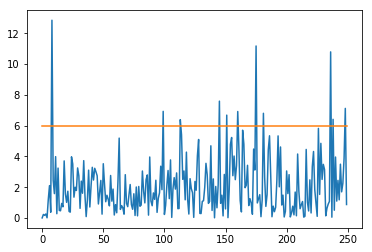

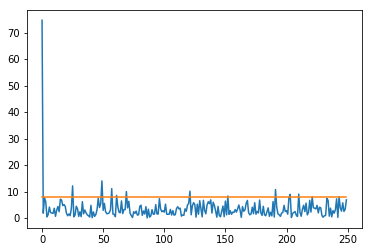

In [66]:
import csv
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

filename = './build/output3.txt'
chi_squared_lidar = 5.991
chi_squared_radar = 7.815

nis_lidar = []
chi_squared_lidar_list = []
nis_radar = []
chi_squared_radar_list = []

with open(filename, 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    next(reader)
    for row in reader:
        #print(row[7])
        if (row[6] == "lidar"):
            nis_lidar.append(float(row[7]))
            chi_squared_lidar_list.append(chi_squared_lidar)
        else:
            nis_radar.append(float(row[7]))
            chi_squared_radar_list.append(chi_squared_radar)
            #pass


x = range(len(nis_lidar))        
plt.plot(x, nis_lidar)
plt.plot(x, chi_squared_lidar_list)
plt.show()
y = range(len(nis_radar))        
plt.plot(y, nis_radar)
plt.plot(y, chi_squared_radar_list)
plt.show()

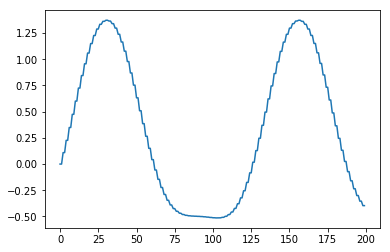

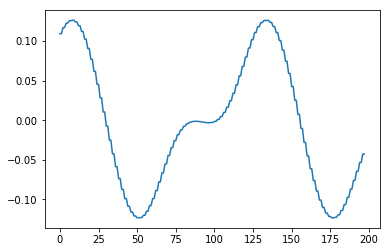

In [77]:
import csv
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

#filename = './data/obj_pose-laser-radar-synthetic-input.txt'
filename = './data/sample-laser-radar-measurement-data-2.txt'

t = []
gt_vx = []
gt_vy = []
gt_xdd = []
gt_ydd = []
gt_yawdd = []
gt_yawddd = []

with open(filename, 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    #next(reader)
    for row in reader:
        if(row[0] == "L"):
            t.append(float(row[3]))
            gt_vx.append(float(row[6]))
            gt_vy.append(float(row[7]))
            #gt_yawdd.append(float(row[9]))
        else:
            t.append(float(row[4]))
            gt_vx.append(float(row[7]))
            gt_vy.append(float(row[8]))
            #gt_yawdd.append(float(row[10]))

for i in range(2,len(t)):

    delta_t = (t[i] - t[i-2])/1000000
    delta_vx = gt_vx[i] - gt_vx[i-2]
    #print(i)
    #print(delta_t)
    gt_xdd.append(delta_vx/delta_t)
    
    delta_vy = gt_vy[i] - gt_vy[i-2]
    gt_ydd.append(delta_vy/delta_t)
    
    #delta_yawdd = gt_yawdd[i] - gt_yawdd[i-1]
    #gt_yawddd.append(delta_yawdd/delta_t)
    
#print(gt_xdd)
x = range(len(gt_vx))       
plt.plot(x, gt_vy)
plt.show()
    
x = range(len(gt_ydd))       
plt.plot(x, gt_ydd)
plt.show()